## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [4]:
path = './images/'
Image_name ='lena-grey.bmp'
lena = io.imread(path.__add__(Image_name))
lena_im_float = img_as_float(lena)


In [5]:
def ImRezise(im , method='nearest',size=0.5):
    print('The resize method is {}'.format(method))
    im_resize = misc.imresize(im,size,method)
    return im_resize

The resize method is nearest
The resize method is bilinear
The resize method is bicubic


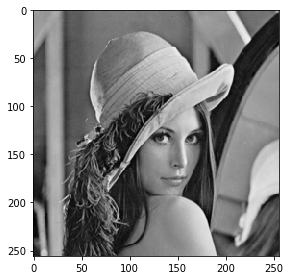

In [6]:
resized_lena_nearest = ImRezise(lena_im_float)
io.imshow(resized_lena_nearest)
resized_lena_bilinear = ImRezise(lena_im_float,method='bilinear')
io.imshow(resized_lena_bilinear)
resized_lena_bicubic = ImRezise(lena_im_float,method='bicubic')
io.imshow(resized_lena_bicubic)


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [9]:
def BlendImg_simple(image0,image1):
    right_side = image0[:,0:int((len(image0[1])/2-1))]
    lefto_side = image1[:,int((len(image1[1])/2-1)):int((len(image1[1])))]
    new_img = np.empty((300,300,3))
    new_img[:,0:int((len(new_img[1])/2)),:] = float_apple[:,0:int((len(float_apple[1])/2)),:]
    new_img[:,int((len(new_img[1])/2)):int((len(new_img[1])))] = float_orange[:,int((len(float_orange[1])/2)):int((len(float_orange[1])))]

    return new_img

In [11]:
apple ='apple.jpeg'
apple = io.imread(path.__add__(apple))
float_apple = img_as_float(apple)
orange ='orange.jpeg'
orange = io.imread(path.__add__(orange))
float_orange = img_as_float(orange)


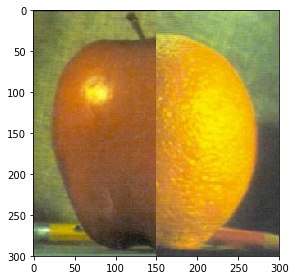

In [12]:
io.imshow(BlendImg_simple(float_apple,float_orange))

In [13]:
def ImBlend(im1,im2, method='simple', win=10):
    
    if np.shape(im1) != np.shape(im2):
        raise ValueError('Images are not the same size.')
    else:
        row, col = np.shape(im1)
        blend_im = np.zeros((row,col))
    
        if method == 'simple':
            BlendImg_simple(im1,im2)

        elif method == 'alpha':
            blend_im[:, :int(col/2)-win] = im1[:, :int(col/2)-win]
            blend_im[:, int(col/2)+win:] = im2[:, int(col/2)+win:]

            x1 = int(col/2)-win
            x2 = int(col/2)+win
            x  = np.arange(x1, x2)
            alpha = x/(x1-x2) -x2/(x1-x2); 
            #alpha = repmat(a , size(I3,1), 1);
            blend_im[:, x1:x2] = alpha* im1[:, x1:x2] + (1- alpha)* im2[:, x1:x2]

        elif method == 'pyramid':
            ## Create a region mask 
            mask = np.zeros(im1.shape)
            mask[:,:int(col/2)] = 1.0
            mask[:, int(col/2):] = 0.0
            
            ## Gaussian pyramid for im1 and im2   
            im1_GP = transform.pyramid_gaussian(im1, downscale=2)
            im1_GP = list(im1_GP)
            print (len(im1_GP))
            im1_GP = [a for a in im1_GP]
            im2_GP = transform.pyramid_gaussian(im2, downscale=2)
            im2_GP = [a for a in im2_GP]
            ## Laplacian pyramid using transform moudle  
            #im1_LP = transform.pyramid_laplacian(im1, downscale=2)
            #im1_LP = [a for a in im1_LP]
            #im2_LP = transform.pyramid_laplacian(im2, downscale=2)
            #im2_LP = [a for a in im2_LP]
            ## Laplacian pyramid using the equation of blending
            im1_LP = Laplacian_pyramid(im1_GP)
            im2_LP = Laplacian_pyramid(im2_GP)
             
            ## Gaussian pyramid for mask
            mask_GP = tuple(transform.pyramid_gaussian(mask, downscale=2))
            mask_GP = [a for a in mask_GP]
            
            ## Blending the two laplacian pyramid
            Blend_pyramid = []
            for i in range(0, len(mask_GP)):
                Blend_pyramid.append(im1_LP[i]*mask_GP[i] + im2_LP[i]*(1 - mask_GP[i]))
          
            ## Colapsing the blending pyramid 
            blend_im = colapse_pyramid(Blend_pyramid)
                
        else:
            print ('unknown method')
            
        
    return blend_im
    

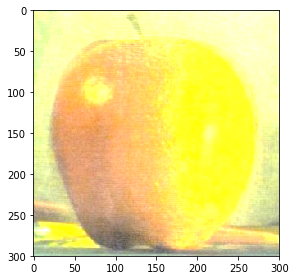

In [14]:
io.imshow(normalized)